In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt
import requests

In [2]:
import seaborn as sns

In [3]:
sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp = pd.read_html(sp_url,header=0)[0]
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 502 non-null    object
 1   Security               502 non-null    object
 2   GICS Sector            502 non-null    object
 3   GICS Sub-Industry      502 non-null    object
 4   Headquarters Location  502 non-null    object
 5   Date added             502 non-null    object
 6   CIK                    502 non-null    int64 
 7   Founded                502 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.5+ KB


In [4]:
sp = sp[['Symbol', 'GICS Sector', 'GICS Sub-Industry']]

In [5]:
sp.head(5)

,Symbol,GICS Sector,GICS Sub-Industry
0,MMM,Industrials,Industrial Conglomerates
1,AOS,Industrials,Building Products
2,ABT,Health Care,Health Care Equipment
3,ABBV,Health Care,Biotechnology
4,ACN,Information Technology,IT Consulting & Other Services


In [6]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Assuming 'sp' is our DataFrame with the S&P 500 symbols
symbols = sp['Symbol'].tolist()

# Function to calculate 1-year return manually
def calculate_1y_return(symbol):
    try:
        # Get historical data for the past 1 year and 1 week (extra week for buffer)
        end_date = datetime.now()
        start_date = end_date - timedelta(days=370)
        hist = yf.download(symbol, start=start_date, end=end_date, progress=False)
        
        if len(hist) > 0:
            # Get first and last available closing prices
            first_price = hist['Close'].iloc[0]
            last_price = hist['Close'].iloc[-1]
            return (last_price - first_price) / first_price
        return None
    except:
        return None

# Function to get financial data for a single stock
def get_stock_data(symbol):
    try:
        stock = yf.Ticker(symbol)
        info = stock.info
        
        # Calculate 1-year return manually
        one_year_return = calculate_1y_return(symbol)
        
        return {
            'Symbol': symbol,
            'P/E Ratio': info.get('trailingPE', None),
            'P/B Ratio': info.get('priceToBook', None),
            'ROE': info.get('returnOnEquity', None),
            'Market Cap': info.get('marketCap', None),
            '1y Return': one_year_return
        }
    except Exception as e:
        print(f"Error fetching data for {symbol}: {str(e)}")
        return None

# Get data for all stocks
financial_data = []
for symbol in symbols:
    data = get_stock_data(symbol)
    if data is not None:
        financial_data.append(data)

# Create a DataFrame from the collected data
financial_df = pd.DataFrame(financial_data)

# Convert columns to numeric
numeric_columns = ['P/E Ratio', 'P/B Ratio', 'ROE', 'Market Cap', '1y Return']
for col in numeric_columns:
    financial_df[col] = pd.to_numeric(financial_df[col], errors='coerce')

# Print info about the DataFrame
print("\nDataFrame Info:")
print(financial_df.info())

# Print summary statistics
print("\nSummary Statistics:")
print(financial_df.describe())

# Print first few rows
print("\nFirst few rows:")
print(financial_df.head())


1 Failed download:
['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')

1 Failed download:
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2023-12-15 11:51:33.149042 -> 2024-12-19 11:51:33.149042)')


$BF.B: possibly delisted; No price data found  (1d 2023-12-15 11:51:33.149042 -> 2024-12-19 11:51:33.149042)



1 Failed download:
['WDC']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')
429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/WY?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=WY&crumb=Edge%3A+Too+Many+Requests


Error fetching data for WY: Expecting value: line 1 column 1 (char 0)


429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/WMB?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=WMB&crumb=Edge%3A+Too+Many+Requests


Error fetching data for WMB: Expecting value: line 1 column 1 (char 0)


429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/WTW?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=WTW&crumb=Edge%3A+Too+Many+Requests


Error fetching data for WTW: Expecting value: line 1 column 1 (char 0)


429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/WYNN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=WYNN&crumb=Edge%3A+Too+Many+Requests


Error fetching data for WYNN: Expecting value: line 1 column 1 (char 0)


429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/XEL?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=XEL&crumb=Edge%3A+Too+Many+Requests


Error fetching data for XEL: Expecting value: line 1 column 1 (char 0)


429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/XYL?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=XYL&crumb=Edge%3A+Too+Many+Requests


Error fetching data for XYL: Expecting value: line 1 column 1 (char 0)


429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/YUM?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=YUM&crumb=Edge%3A+Too+Many+Requests


Error fetching data for YUM: Expecting value: line 1 column 1 (char 0)


429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ZBRA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ZBRA&crumb=Edge%3A+Too+Many+Requests


Error fetching data for ZBRA: Expecting value: line 1 column 1 (char 0)


429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ZBH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ZBH&crumb=Edge%3A+Too+Many+Requests


Error fetching data for ZBH: Expecting value: line 1 column 1 (char 0)


429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ZTS?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ZTS&crumb=Edge%3A+Too+Many+Requests


Error fetching data for ZTS: Expecting value: line 1 column 1 (char 0)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      492 non-null    object 
 1   P/E Ratio   465 non-null    float64
 2   P/B Ratio   461 non-null    float64
 3   ROE         461 non-null    float64
 4   Market Cap  490 non-null    float64
 5   1y Return   489 non-null    float64
dtypes: float64(5), object(1)
memory usage: 23.2+ KB
None

Summary Statistics:
        P/E Ratio   P/B Ratio         ROE    Market Cap   1y Return
count  465.000000  461.000000  461.000000  4.900000e+02  489.000000
mean          inf    8.596545    0.294386  1.103225e+11    0.143759
std           NaN   21.579085    0.745676  3.454258e+11    0.351535
min      2.921875    0.426193   -0.759690  4.685997e+09   -0.628373
25%     16.653710    1.887087    0.087590  1.893617e+10   -0.

In [7]:
# Create a DataFrame from the collected data
financial_df = pd.DataFrame(financial_data)

# Merge with sector information from sp DataFrame
financial_df = financial_df.merge(sp[['Symbol', 'GICS Sector', 'GICS Sub-Industry']], 
                                on='Symbol', 
                                how='left')

# Convert columns to numeric
numeric_columns = ['P/E Ratio', 'P/B Ratio', 'ROE', 'Market Cap', '1y Return']
for col in numeric_columns:
    financial_df[col] = pd.to_numeric(financial_df[col], errors='coerce')


# Save to CSV if needed
financial_df.to_csv('sp500_financial_data.csv', index=False)



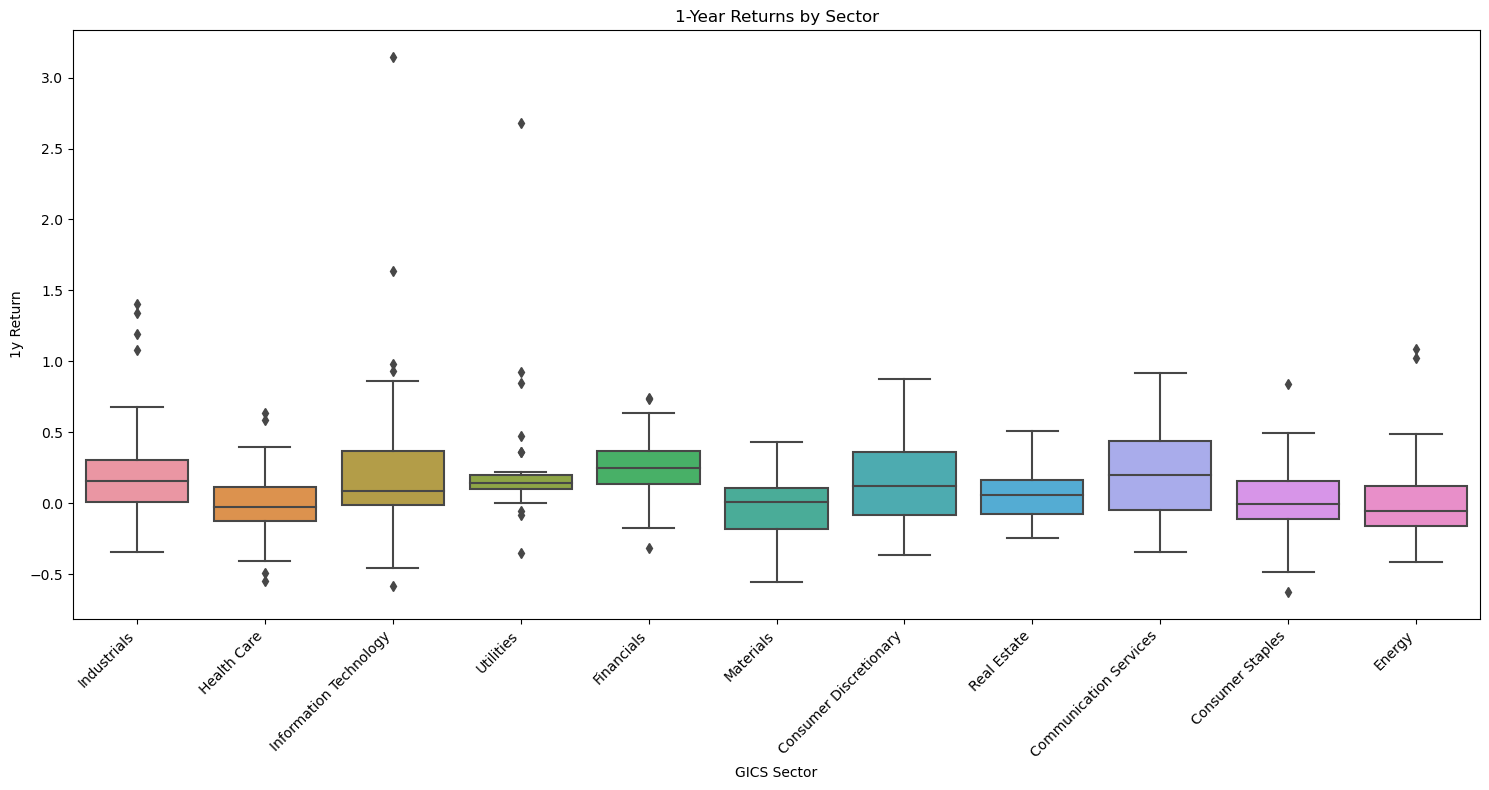

In [8]:
# Box plot by sector
plt.figure(figsize=(15, 8))
sns.boxplot(x='GICS Sector', y='1y Return', data=financial_df)
plt.xticks(rotation=45, ha='right')
plt.title('1-Year Returns by Sector')
plt.tight_layout()
plt.show()



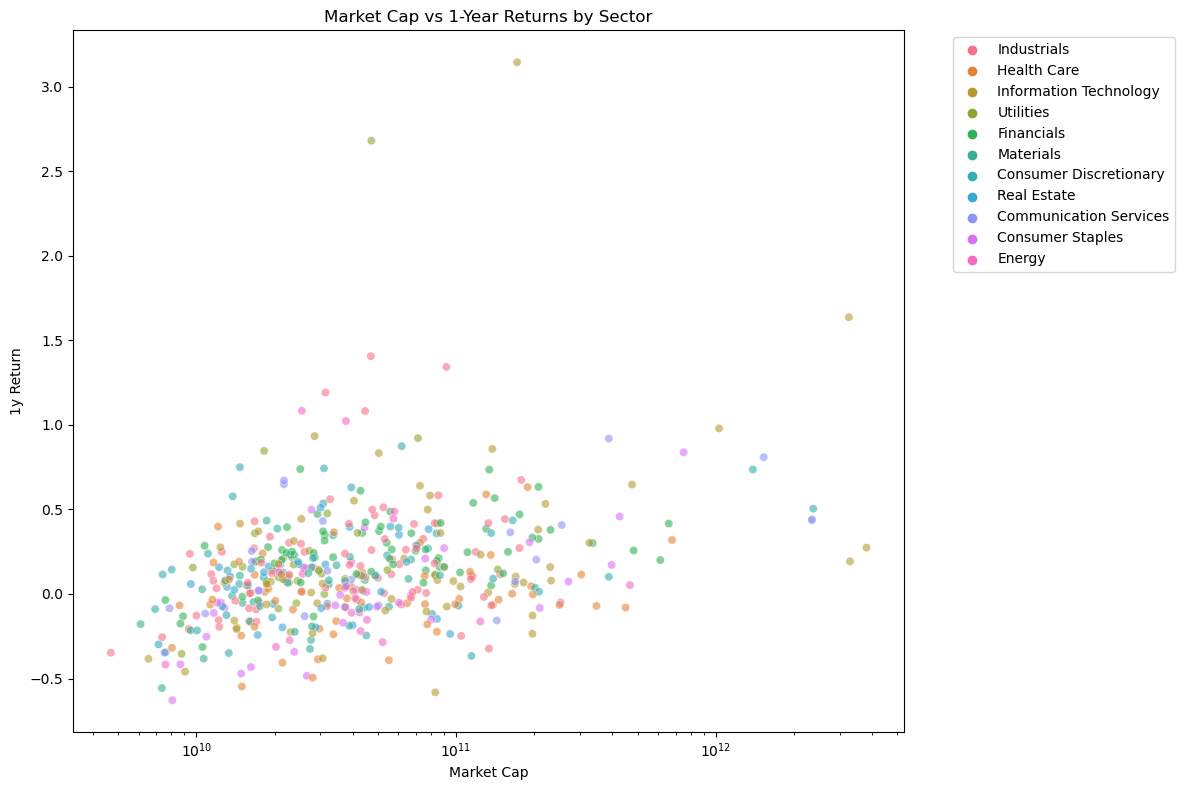

In [9]:
# Scatter plot of Market Cap vs Returns by Sector
plt.figure(figsize=(12, 8))
sns.scatterplot(data=financial_df, x='Market Cap', y='1y Return', hue='GICS Sector', alpha=0.6)
plt.xscale('log')
plt.title('Market Cap vs 1-Year Returns by Sector')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Overall Market Analysis
--------------------------------------------------

Overall Market Analysis Results:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.2413      1.297     10.211      0.000      10.693      15.789
P/E Ratio      9.0851      3.288      2.763      0.006       2.624      15.546
P/B Ratio     10.8274      3.013      3.593      0.000       4.906      16.749

Sector-Specific Analysis Results:
                    Sector  P/E Coefficient  P/E P-value  P/B Coefficient  P/B P-value  R-squared   N
10                  Energy          75.7139       0.0178         151.4743       0.0004     0.6802  20
3                Utilities          99.4088       0.1038         195.0363       0.0001     0.5162  29
8   Communication Services           8.5918       0.8182         114.5999       0.0074     0.3921  21
5                Materials          48.0656       0.0

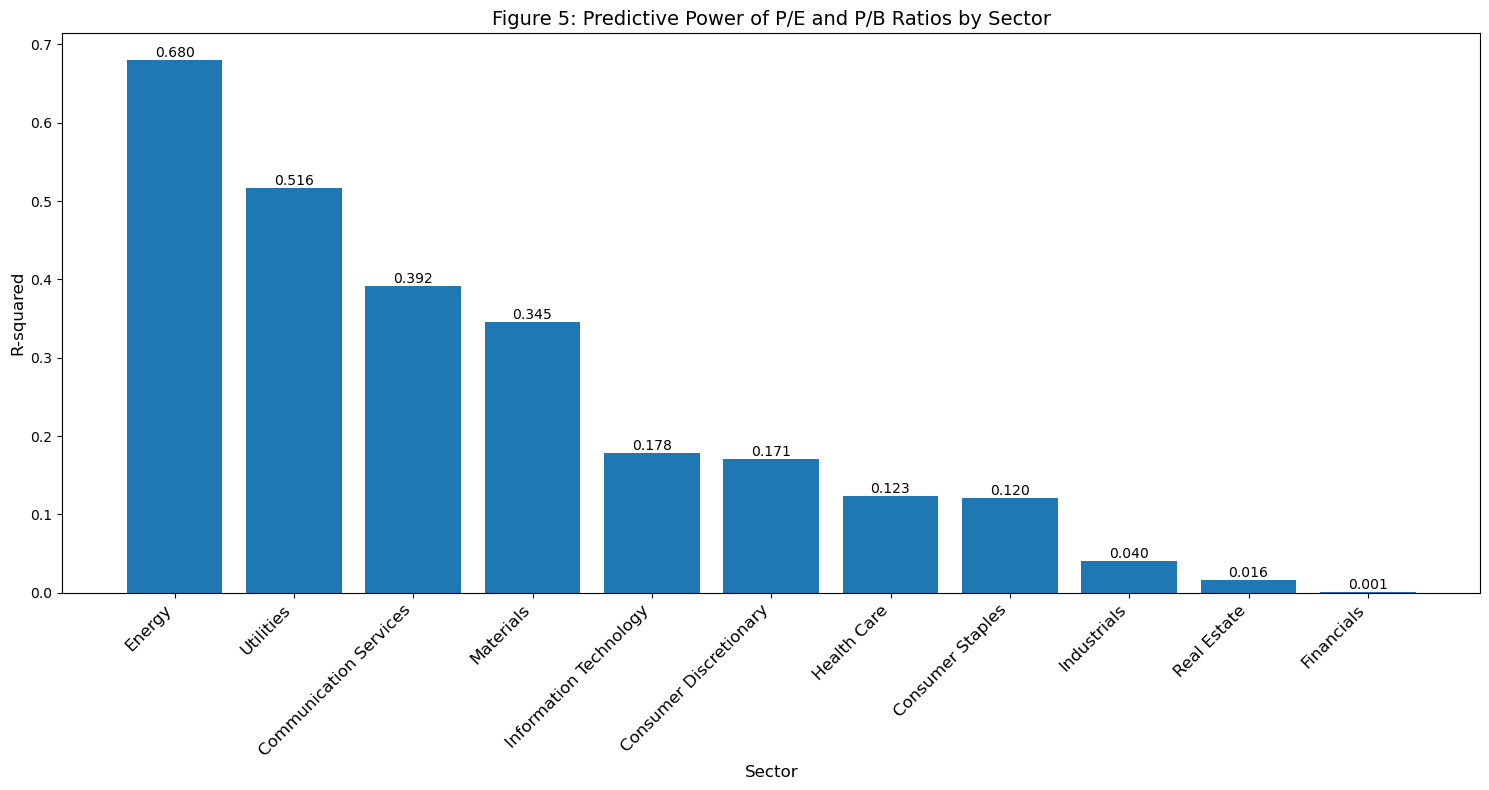

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

# Create clean dataset for analysis
analysis_df = financial_df.copy()

# Convert return to percentage
analysis_df['1y Return (%)'] = analysis_df['1y Return'] * 100

# Remove infinite values and outliers
analysis_df = analysis_df.replace([np.inf, -np.inf], np.nan)

# Function to remove outliers
def remove_outliers(df, columns, n_std=3):
    df_clean = df.copy()
    for col in columns:
        mean = df_clean[col].mean()
        std = df_clean[col].std()
        df_clean = df_clean[
            (df_clean[col] <= mean + (n_std * std)) & 
            (df_clean[col] >= mean - (n_std * std))
        ]
    return df_clean

# Remove outliers from key metrics
analysis_df = remove_outliers(
    analysis_df, 
    ['P/E Ratio', 'P/B Ratio', '1y Return (%)'],
    n_std=3
)

# Drop rows with NaN values in key columns
analysis_df = analysis_df.dropna(subset=['P/E Ratio', 'P/B Ratio', '1y Return (%)', 'GICS Sector'])

# Function to run regression analysis and return metrics
def run_regression_analysis(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model

# 1. Overall Market Analysis
print("Overall Market Analysis")
print("-" * 50)

# P/E Analysis
X_pe = analysis_df['P/E Ratio']
y_return = analysis_df['1y Return (%)']
pe_results = run_regression_analysis(X_pe, y_return)

# P/B Analysis
X_pb = analysis_df['P/B Ratio']
pb_results = run_regression_analysis(X_pb, y_return)

# Combined Analysis
X_combined = analysis_df[['P/E Ratio', 'P/B Ratio']]
combined_results = run_regression_analysis(X_combined, y_return)

# Create summary tables
def create_summary_table(results, title):
    summary_data = {
        'Coefficient': results.params,
        'Std Error': results.bse,
        't-value': results.tvalues,
        'P-value': results.pvalues,
        'R-squared': [results.rsquared] + [np.nan] * (len(results.params)-1)
    }
    summary_df = pd.DataFrame(summary_data)
    summary_df = summary_df.round(4)
    print(f"\n{title}")
    return summary_df

# 2. Sector-Specific Analysis
sector_results = {}
sector_summary = []

for sector in analysis_df['GICS Sector'].unique():
    sector_data = analysis_df[analysis_df['GICS Sector'] == sector]
    
    if len(sector_data) > 10:  # Only analyze sectors with sufficient data
        try:
            X_sector = sector_data[['P/E Ratio', 'P/B Ratio']]
            y_sector = sector_data['1y Return (%)']
            
            results = run_regression_analysis(X_sector, y_sector)
            
            sector_summary.append({
                'Sector': sector,
                'P/E Coefficient': results.params['P/E Ratio'],
                'P/E P-value': results.pvalues['P/E Ratio'],
                'P/B Coefficient': results.params['P/B Ratio'],
                'P/B P-value': results.pvalues['P/B Ratio'],
                'R-squared': results.rsquared,
                'N': len(results.fittedvalues)
            })
        except:
            print(f"Could not analyze sector: {sector}")

# Create sector summary DataFrame
sector_summary_df = pd.DataFrame(sector_summary)

# Round all numeric columns to 4 decimal places
numeric_columns = ['P/E Coefficient', 'P/E P-value', 'P/B Coefficient', 
                  'P/B P-value', 'R-squared']
sector_summary_df[numeric_columns] = sector_summary_df[numeric_columns].round(4)

# Sort by R-squared
sector_summary_df = sector_summary_df.sort_values('R-squared', ascending=False)

# Print results
print("\nOverall Market Analysis Results:")
print(combined_results.summary().tables[1])

print("\nSector-Specific Analysis Results:")
print(sector_summary_df.to_string())

# Create visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
bars = plt.bar(sector_summary_df['Sector'], sector_summary_df['R-squared'])
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('R-squared', fontsize=12)
plt.xlabel('Sector', fontsize=12)
plt.title('Figure 5: Predictive Power of P/E and P/B Ratios by Sector', fontsize=14)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Optional: Save results to Excel
with pd.ExcelWriter('valuation_analysis.xlsx') as writer:
    sector_summary_df.to_excel(writer, sheet_name='Sector Analysis', index=False)